<a href="https://colab.research.google.com/github/valeriaotr/cs102/blob/homework06/homework06_task2_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [10]:
# 1
full_dataset <- read.csv('/content/music_genre.csv', header=TRUE)

In [11]:
# 2

dataset <- full_dataset[sample(nrow(full_dataset), 20000),]
nrow(dataset)

[1] 20000

In [15]:
# 3
print(dataset[duplicated(dataset),][0])
dt <- unique(dataset)
print(dt[duplicated(dt),][0])

data frame with 0 columns and 2 rows
data frame with 0 columns and 0 rows


In [ ]:
# 4

nrow(dt[dt$artist_name == 'empty_field',])
dt <- dt[!dt$artist_name == 'empty_field',]
nrow(dt[dt$artist_name == 'empty_field',])

[1] 952

[1] 0

### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [16]:
# 1
prop.table(table(dt$music_genre))*100


            Alternative       Anime       Blues   Classical     Country 
  0.0050005   9.8859886   9.8209821  10.2860286   9.8159816  10.2660266 
 Electronic     Hip-Hop        Jazz         Rap        Rock 
 10.0310031  10.0910091   9.8159816   9.9409941  10.0410041 

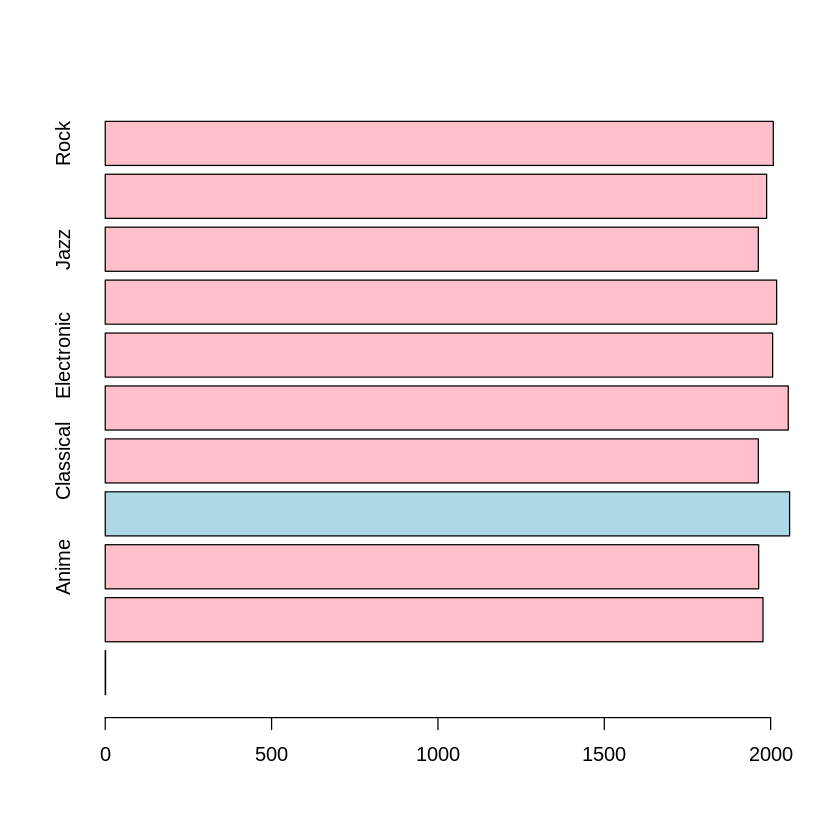

In [20]:
# 2

table <- table(dt$music_genre)
cols <- c("pink", "lightblue")[1+(x==max(x))]
barplot(table, col=cols, horiz=TRUE)

In [21]:
# 3
dance <- aggregate(dt$danceability, by=list(Genre=dt$music_genre), FUN=mean)

dance[]

Genre,x
<chr>,<dbl>
,NA
Alternative,0.5416518
Anime,0.4722251
Blues,0.5336393
Classical,0.3050687
Country,0.5752596
Electronic,0.6195723
Hip-Hop,0.7183513
Jazz,0.5811161


In [ ]:
library(ggplot2)

In [26]:
# 4
genres <- unique(dataset$music_genre)
genres <- genres[genres != ""]

min_maj <- vector(mode = "character", length = length(genres))
amount <- vector(mode = "integer", length = length(genres))

for (i in seq_along(genres)) {
  genre <- genres[i]
  subset_dataset <- subset(dataset, music_genre == genre)
  
  amount_major <- sum(subset_dataset$mode == 'Major', na.rm = TRUE)
  amount_minor <- sum(subset_dataset$mode == 'Minor', na.rm = TRUE)
  
  min_maj[i] <- ifelse(amount_major > amount_minor, "Major", "Minor")
  amount[i] <- ifelse(amount_major > amount_minor, amount_major, amount_minor)
}

dataset_n <- data.frame(genre = as.character(genres), mode = as.character(min_maj), amount = as.numeric(amount))
dataset_n


genre,mode,amount
<chr>,<chr>,<dbl>
Jazz,Major,1063
Blues,Major,1466
Classical,Major,1314
Hip-Hop,Major,1117
Anime,Major,1232
Rap,Major,1126
Alternative,Major,1270
Electronic,Major,1105
Rock,Major,1491


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [30]:
artists <- unique(dataset$artist_name)
amount_of_tracks <- sapply(artists, function(artist) {
  nrow(dataset[dataset$artist_name == artist, ])
})
new_dataframe <- data.frame(artist = artists, amount = amount_of_tracks)
new_dataframe$amount <- as.numeric(as.character(new_dataframe$amount))
print(new_dataframe[which.max(new_dataframe$amount), ])
print(new_dataframe[which.min(new_dataframe$amount), ])


                 artist amount
empty_field empty_field    945
           artist amount
Minthaze Minthaze      1


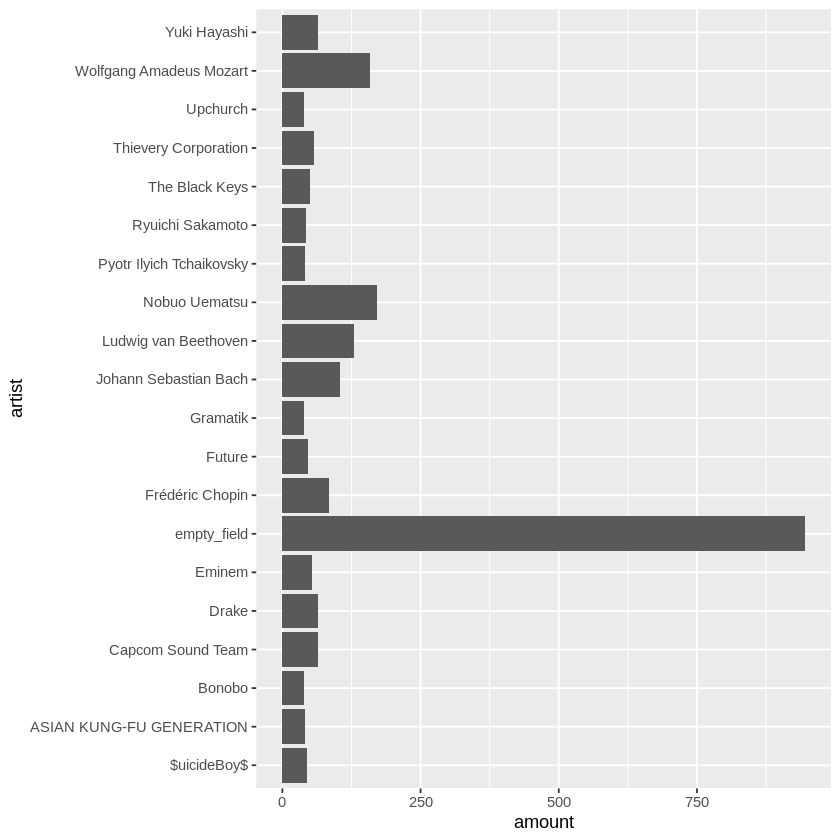

In [32]:
library(dplyr)

new_dataframe <- arrange(new_dataframe, desc(amount)) %>%
  head(20)

ggplot(new_dataframe, aes(x = artist, y = amount)) +
  geom_col() +
  coord_flip()



### Задание 4
1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [33]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



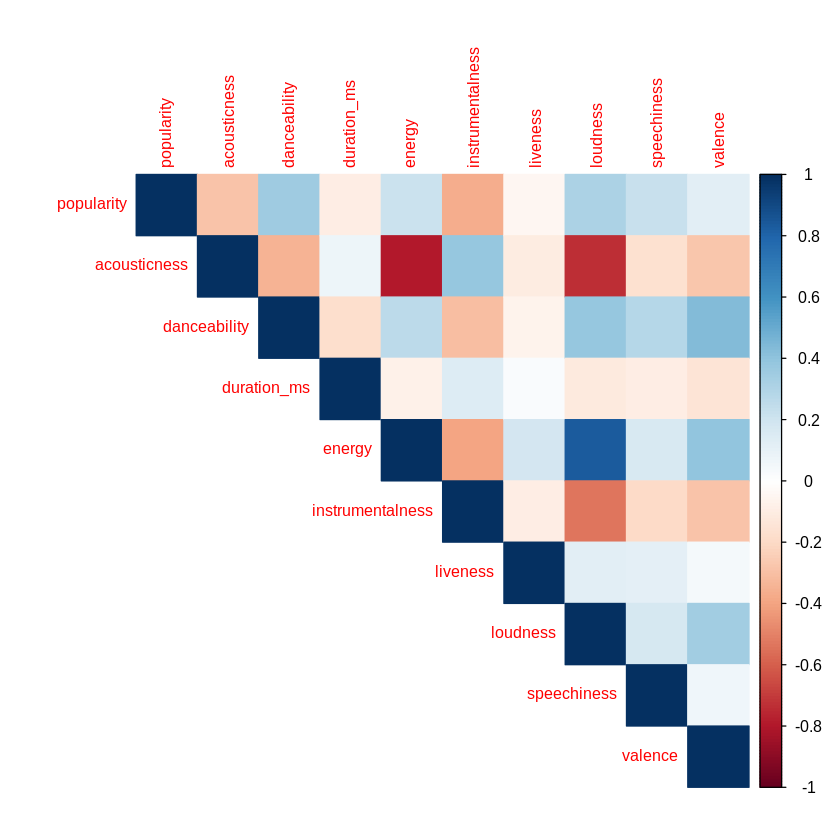

In [37]:
library(dplyr)
library(tidyr)
library(corrplot)

selected_cols <- c("popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence")

dataset_clean <- dataset %>%
  select(selected_cols) %>%
  drop_na() %>%
  mutate_all(as.numeric)

correlation_matrix <- cor(dataset_clean)

corrplot(correlation_matrix, method = "color", type = "upper", tl.cex = 0.8)




### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?


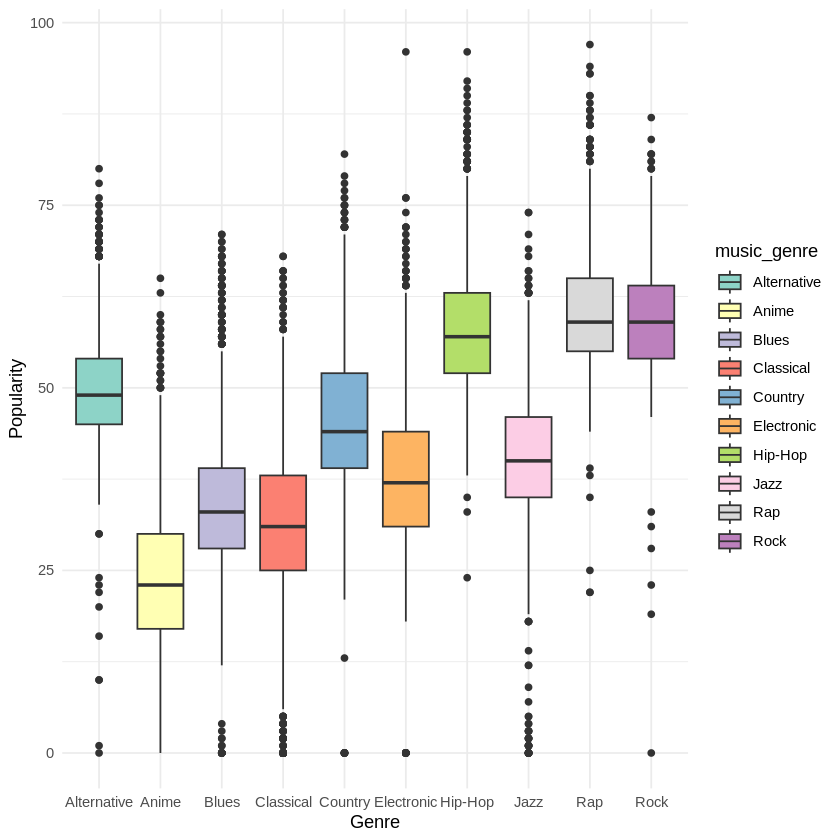

In [41]:
library(dplyr)
library(ggplot2)

dataset_popularity <- dataset %>%
  select(popularity, music_genre) %>%
  mutate(popularity = as.numeric(popularity)) %>%
  drop_na() %>%
  mutate(music_genre = factor(music_genre))

ggplot(dataset_popularity, aes(x = music_genre, y = popularity, fill = music_genre)) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Set3") +
  labs(x = "Genre", y = "Popularity") +
  theme_minimal()


### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого 
популярного исполнителя. Диаграмма должна быть одна.

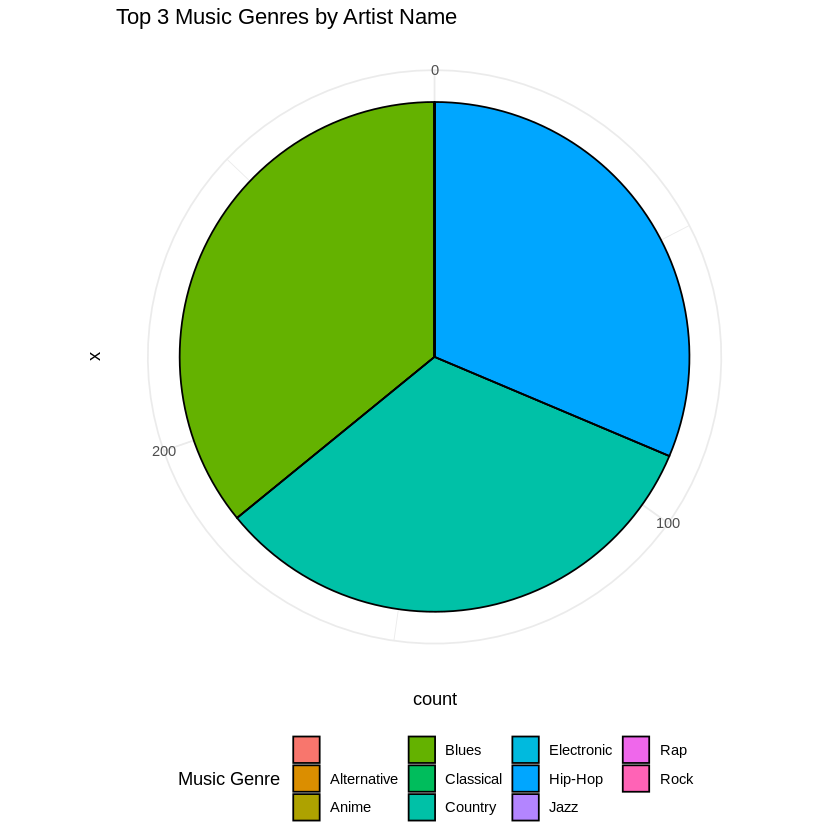

In [48]:
top3_genres <- names(sort(table(dataset$music_genre), decreasing = TRUE))[1:3]

is_top_genre <- dataset$music_genre %in% top3_genres

genres_artists <- subset(dataset, select = c("artist_name", "music_genre"))
genres_artists$count <- is_top_genre

genres_artists_count <- aggregate(count ~ artist_name + music_genre, data = genres_artists, FUN = sum)

genres_artists_count <- genres_artists_count[order(-genres_artists_count$count), ]
genres_artists_count <- genres_artists_count[!duplicated(genres_artists_count$music_genre), ]

new_dataset <- data.frame(artist_name = genres_artists_count$artist_name,
                          music_genre = genres_artists_count$music_genre,
                          count = genres_artists_count$count)

pie_chart <- ggplot(new_dataset, aes(x = "", y = count, fill = music_genre)) +
  geom_bar(stat = "identity", width = 1, color = "black") +
  coord_polar(theta = "y", start = 0) +
  labs(title = "Top 3 Music Genres by Artist Name", fill = "Music Genre") +
  theme_minimal() +
  theme(legend.position = "bottom")

print(pie_chart)


### Задание 7
На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.


In [53]:
# calculating for each genre
genre_popularity <- tapply(dataset$popularity, dataset$music_genre, mean)
dataset_popularity <- data.frame(genre = names(genre_popularity), popularity = genre_popularity)

# converting
dataset_popularity$genre <- as.character(dataset_popularity$genre)
dataset_popularity$popularity <- as.numeric(dataset_popularity$popularity)

# finding
min_genre <- dataset_popularity$genre[which.min(dataset_popularity$popularity)]
max_genre <- dataset_popularity$genre[which.max(dataset_popularity$popularity)]

# extracting
minmax_cols <- c("acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence")

# creating dataframes
dataset_min <- dataset[dataset$music_genre == min_genre, minmax_cols, drop = FALSE]
min_means <- colMeans(dataset_min, na.rm = TRUE)

dataset_max <- dataset[dataset$music_genre == max_genre, minmax_cols, drop = FALSE]
max_means <- colMeans(dataset_max, na.rm = TRUE)

print(max_means)

    acousticness     danceability           energy instrumentalness 
      0.16772505       0.69395523       0.65462425       0.01234599 
        liveness         loudness      speechiness          valence 
      0.19703290      -6.65389336       0.18538647       0.45102329 


In [54]:
print(min_means)

    acousticness     danceability           energy instrumentalness 
      0.27914979       0.47222505       0.67279053       0.27675167 
        liveness         loudness      speechiness          valence 
      0.19769175      -7.82181568       0.06439394       0.43642118 


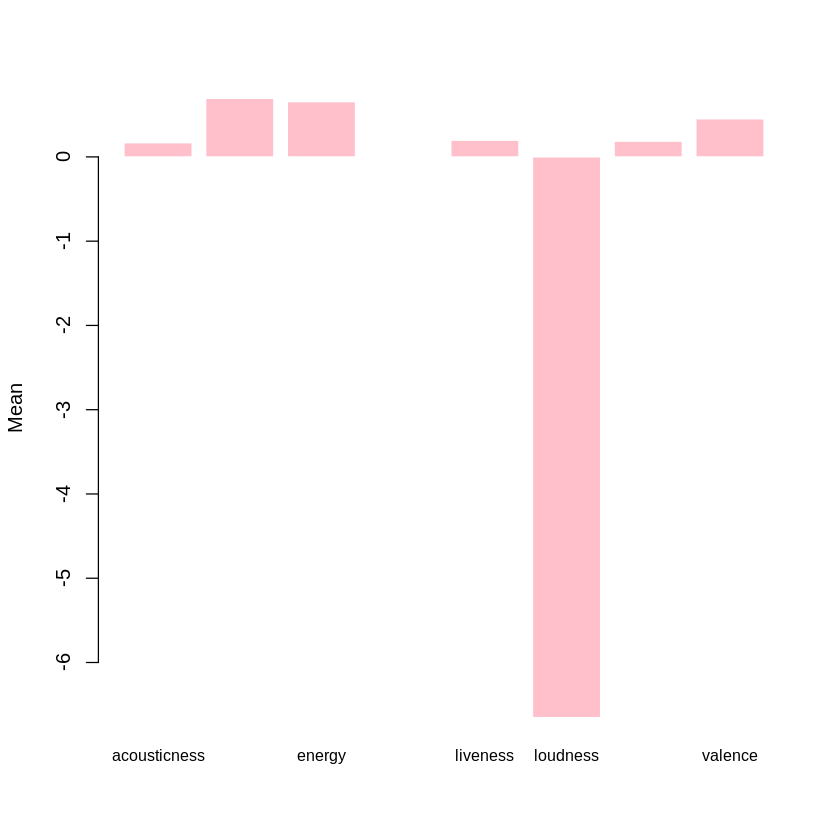

In [55]:
barplot(max_means, 
        ylab = "Mean",
        col = "pink",
        border = "white",
        cex.names = 0.8)

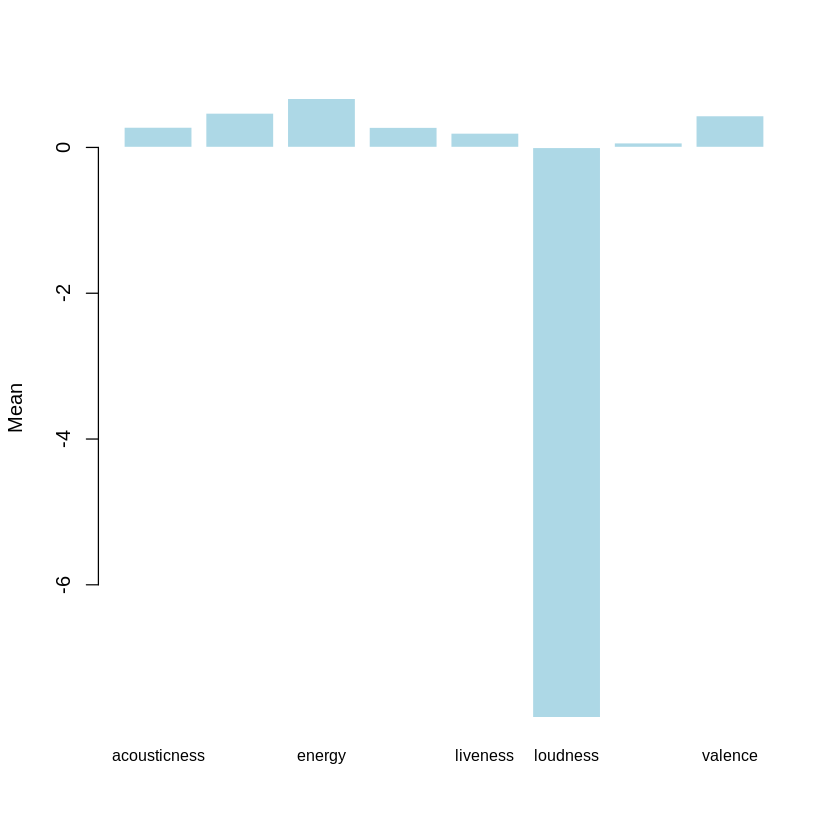

In [56]:
barplot(min_means, 
        ylab = "Mean",
        col = "lightblue",
        border = "white",
        cex.names = 0.8)

### Задание 8
1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [58]:
library(dplyr)

dataset <- dataset %>% 
  mutate(track_length = case_when(
    duration_ms/1000/60 <= 3 ~ "short",
    duration_ms/1000/60 <= 5 ~ "medium",
    TRUE ~ "long"
  ))

head(dataset, n = 5)


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,track_length
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
11607,74808,Donny Hathaway,Jealous Guy - Live Version,46,0.76200,0.649,189400,0.232,7.82e-06,C,0.6840,-16.551,Major,0.0799,61.059,4-Apr,0.648,Jazz,medium
30707,23687,Ron Gallo,Am I Demon?,26,0.01370,0.335,219096,0.840,1.29e-04,D,0.1090,-5.829,Major,0.0538,125.26799999999999,4-Apr,0.147,Blues,medium
31003,28756,The Modern Lovers,I Wanna Sleep In Your Arms,33,0.00665,0.667,152293,0.686,3.01e-01,E,0.0763,-6.659,Minor,0.0316,124.234,4-Apr,0.663,Blues,short
10129,20495,Ohio Players,Don't Say Goodbye,42,0.14600,0.809,348467,0.560,9.42e-05,G,0.0835,-8.644,Minor,0.0612,116.993,4-Apr,0.825,Jazz,long
34614,67985,B.B. King,Better Not Look Down - Single Version,41,0.74500,0.723,-1,0.734,1.64e-02,C#,0.0443,-11.088,Major,0.2350,102.164,4-Apr,0.742,Blues,short


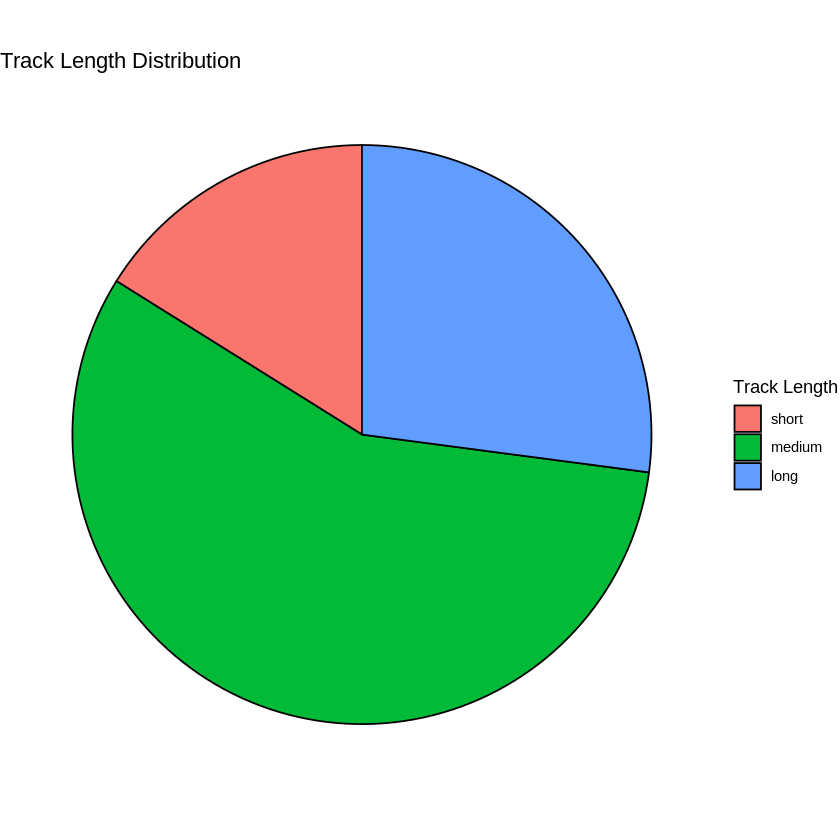

In [60]:
track_len_labels <- c("short", "medium", "long")
total <- nrow(dataset)

pie_chart <- ggplot(data = dataset, aes(x = "", fill = track_length)) +
  geom_bar(width = 1, color = "black", position = "fill") +
  coord_polar(theta = "y") +
  ggtitle("Track Length Distribution") +
  scale_fill_discrete(name = "Track Length", labels = track_len_labels) +
  labs(y = paste0("Proportion (n = ", total, ")")) +
  theme_void()

print(pie_chart)